# Градиентный спуск для одной переменной и свободного члена



## Вступление<br>
Это первый ноутбук в серии, где я буду с нуля создавать базовые алгоритмы машинного обучения с объяснениями и дополнительными материлами.<br>
Так я сам разберусь в мелочах, а впоследствии, может помогу еще кому-нибудь

В задачах градиентного спуска я ставлю себе цель использовать по-минимуму уже готовых математических решений, таких как numpy

**Задача текущего ноутбука:**<br>
Создать ряд функций, которые позволят прийти максимально близко к фактическому распределению данных через формулу вида $y=a*x+b$ <br>



1.   Мы построим синтетические данные, которые подчиняются известному закону, например, $y=5*x+6$, без выбросов
2.   Разберем теорию градиентного спуска
3. Построим функцию нрадиентного спуска
4. Проверим функцию на реальных данных зависимости веса от роста



## Формируем синтетические данные

In [1]:
import matplotlib.pyplot as plt

In [2]:
# Сначала, заполним x. От -10 до 10 с шагом 0.1
# И по нему построим y через формулу 5*x + 6

# X_true - признаки, которые мы будем подавать в функцию, чтобы получить y_pred
X_true = []
y_true = []

# range работает только с целыми. Умножим все на 10, а при append, поделим на 10
for i in range(-100, 100, 1):
  X_true.append(i/10)
  y_true.append(5*i/10+6)

Посморим на данные, которые нам известны

In [3]:
X_true[:10]

[-10.0, -9.9, -9.8, -9.7, -9.6, -9.5, -9.4, -9.3, -9.2, -9.1]

In [4]:
y_true[:10]

[-44.0, -43.5, -43.0, -42.5, -42.0, -41.5, -41.0, -40.5, -40.0, -39.5]

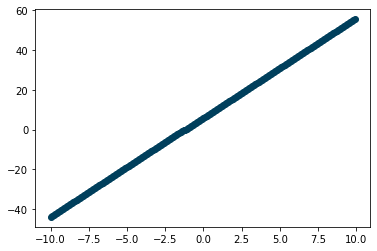

In [5]:
plt.scatter(X_true, y_true, color='#003f5c')
plt.show()

Мы решаем задачу регрессии<br>Мы знаем, что линейная регрессия подчинятся закону y=a*x+b
<br><br>
Давайте, возьмем случайные а и b от фактического x и посчитаем новый y

In [6]:
# Я возьму a=1 и b=1

a = 1
b = 1

y_pred = []
for f in X_true:
  y_pred.append(f*a + b)

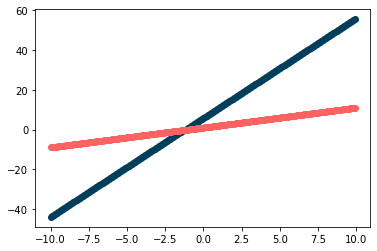

In [7]:
plt.scatter(X_true, y_true, color='#003f5c')
plt.scatter(X_true, y_pred, color='#ff6361')
plt.show()

Очевидно, что мы не попали в нужные точки. Чтобы понимать насколько мы приблизились в своем предсказании, необходимо ввести кост-функцию

## Теоретическая часть

Стандартный путь оптимизации выглядит так:<br>


1.   Проверяем разницу между предсказанными данными и реальными
2.   Если нас не устроил резуальтат, меняем веса перед $x_i$ и возврвщаемся к 1 пункту. Если результат первого пункта нас устроил, начинаем использовать выведенные коэффициенты
<br>
Теперь, разберем алгоритм с математической точки зрения.
<br>

Функций, которые описывают точность моеделей великое множество. Но нам нужна такая, у которой мы можем посчитать производную.<br>Я выбрал [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) <br><br>$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i})^2 $<br>
$y_i$ - y_true<br>
$\hat{y_i}$ - y_pred, а также $\hat{y_i} = a*x_i + b$, а, занчит, $MSE = \frac{1}{n} \sum_{i=1}^n (y_i - (a*x_i + b))^2 $
<br>Разобрались с тем, как будем измерять качество предсказаний<br><br>
Разберемся с изменением весов $x_i$ и свободного члена $b$. <br><br>Много лет назад, специально обученные ученые сказали, что для минимизации кост функции, мы должны двигаться в направлении противоположном направлению градиента (градиент всегда направлен в сторону увеличения функции). И сдвигаться на какой-то коэффициент, его называют learning rate.<br><br>
Что нужно знать, чтобы посчитать градиент и сдвинуться:


1.   [Как найти производную](http://mathprofi.ru/kak_naiti_proizvodnuju.html)
2. Производная суммы равна сумме производных
3.   [Производная сложной функции](http://mathprofi.ru/proizvodnaya_slozhnoi_funkcii.html)
4. [Градиент и частные производные](http://mathprofi.ru/proizvodnaja_po_napravleniju_i_gradient.html)
<br><br>
Мы готовы посчитать частные производные MSE по $a$ и по $b$<br><br>
Частная производная по $a$ равна $ \frac{\delta f}{\delta a} = \frac{1}{n} \sum_{i=1}^n-2*(y-(a*x_i+b))*x_i $ <br><br>
Частная производная по $b$ равна $ \frac{\delta f}{\delta b} = \frac{1}{n} \sum_{i=1}^n-2*(y-(a*x_i+b)) $ 

# Код градиентного спуска

In [8]:
# Создаем MSE кост-функцию
def mse_function(y_true: list, y_pred: list) -> float:
  '''
  Функция, которая считет MSE

  :param y_true: значения y, которые мы знаем из фактических данных
  :param y_pred: значения y, которые мы получили в данный момент

  :return mse: значеник MSE по формуле
  '''
  # Кол-во значений, которое мы сравнивам
  n = len(y_true)
  # Стартуем с нуля
  pre_mse = 0
  for index, value in enumerate(y_true):
    pre_mse += (value - y_pred[index])**2
  mse = pre_mse/n
  return mse

Посчитаем MSE. Вдруг, мы уже попали

In [9]:
mse_function(y_true, y_pred)

556.36

Не попали. Давайте напишем алгоритм, который будет менять a и b

In [10]:
# learning rate - на него мы будем делать сдвиг
lr = 0.003
# Максимальное количество шагов, чтобы не ждать вечность, 
# если мы не попадем в оптимум
max_steps = 30000
# Стартовый mse. Просто на всякий случай
mse = 999
# Стартовые коэффициенты
a=2
b=-1
# Счетчик шагов
step = 0

# Сделаем трекинг обучения
mse_list = []
a_list = []
b_list = []
y_preds = []

y_pred = []
# количество элементов в предсказаниях/реальных данных
n=len(y_true)

# модель будет работать пока мы не пройдем все шаги, 
# или разница по MSE не будет меньше 1e-10
while (step <= max_steps) and (mse >= 1e-10):
  # Создаем переменные градиентов
  grad_a=0
  grad_b=0
  # Вычисляем сдвиги, как было описано в теории
  for i, x in enumerate(X_true):
    grad_a += -2*(y_true[i] - (a*x + b))* x
    grad_b += -2*(y_true[i] - (a*x + b))
  grad_a = grad_a/n
  grad_b = grad_b/n
  # Делаем сдвиг в сторону противоположную градиенту с учетом lr
  a -= lr*grad_a
  b -= lr*grad_b
  # Считаем новые предасказания
  y_pred = [a*x+b for x in X_true]
  # Проверяем MSE
  mse = mse_function(y_true, y_pred)
  # Записываем результаты
  mse_list.append(mse)
  a_list.append(a)
  b_list.append(b)
  y_preds.append(y_pred)
  step += 1

In [11]:
steps_x = []
for i, f in enumerate(mse_list):
  steps_x.append(i+1)

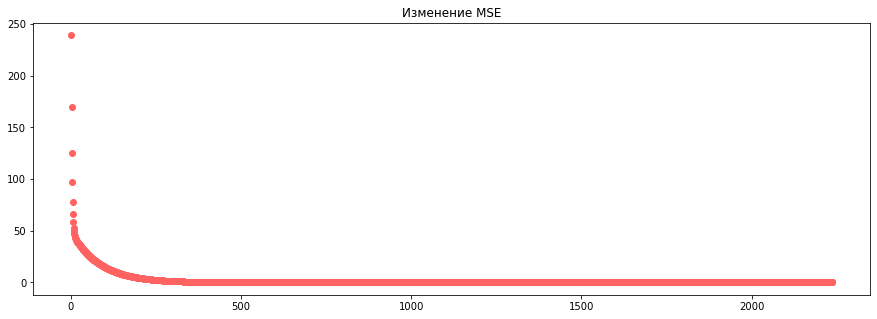

In [12]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()
ax.scatter(steps_x, mse_list, color='#ff6361')
plt.title('Изменение MSE')
plt.show()

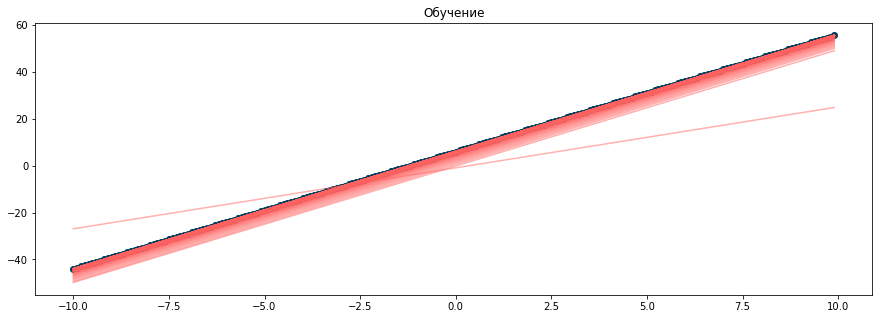

In [13]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()
alpha = 0.5
for j in range(0, len(y_preds), 20):
  alpha += 0.5/(len(y_preds)/20)
  ax.plot(X_true, y_preds[j], color='#ff6361', alpha=alpha)
ax.scatter(X_true, y_true, color='#003f5c')
plt.title('Обучение')
plt.show()

In [14]:
print('Формула, по которой мы будем формирвать предсказания: {:.4f}*x+{:.4f}'.format(a, b))
print('Ошибка по MSE составила: {:.4f}'.format(mse))

Формула, по которой мы будем формирвать предсказания: 5.0000*x+6.0000
Ошибка по MSE составила: 0.0000


Тест прошел успешно. Напишем класс, который будет обучаться

## Класс функции градиента

In [27]:
class GradientDescents:
  
  '''
  Имплементация градиентного спуска с нуля
  '''

  def progress_tracker(self, step: int, cost_function: float) -> None:
    '''
    Функция позволяет отслеживать онлайн прогресс

    :param step: текущий шаг
    :param cost_function: значение кост-функции в данный момент

    '''
    from IPython.display import clear_output
    clear_output(wait=True)
    print('Шаг: {}'.format(step))
    print('Функция потерь: {:.2f}'.format(cost_function))

  def mse_function(self, y_true: list, y_pred: list) -> float:
    '''
    Функция, которая считет MSE

    :param y_true: значения y, которые мы знаем из фактических данных
    :param y_pred: значения y, которые мы получили в данный момент

    :return mse: значеник MSE по формуле
    '''
    # Кол-во значений, которое мы сравнивам
    n = len(y_true)
    # Стартуем с нуля
    pre_mse = 0
    for index, value in enumerate(y_true):
      pre_mse += (value - y_pred[index])**2
    mse = pre_mse/n
    return mse
  
  def gradient_descent(self, X_true: list, y_true: list, \
                       start_a: float = 1.0, start_b: float = 1.0, \
                       learning_rate: float = 0.003, max_steps: int =30000, \
                       save_steps: int = 0) -> dict:
    '''
    Простейший градиентный спуск для формул вида y=a*x+b

    :param start_a: стартовое значение a
    :param start_b: стартовое значение b
    :param learning_rate: коэффициент обучения
    :param max_steps: максимальное кол-во шагов, при которых алгоритм остановится
    :param save_steps: если 0, сохранится только последний шаг
                       если значение отличное от нуля, 
                       будет сохраняться каждый i-ый шаг
                       
    :return return_dict: {
                :return a: значение a
                :return b: значение b
                :return mse: значение MSE по формуле
                :return steps: кол-во прошедших шагов
                :return mse_list: значение списка MSE по формуле для графика, если save_steps > 0
                :return a_list: значение a для графика, если save_steps > 0
                :return b_list: значение b для графика, если save_steps > 0
                        }
    '''
    # Инициализируем первый шаг
    step = 0
    a = start_a
    b = start_b
    mse = 9999999
    mse_prev = 0

    # Сделаем трекинг обучения
    mse_list = []
    a_list = []
    b_list = []

    # Список посчитанных y для кост-функции
    y_pred = []
    # количество элементов в предсказаниях/реальных данных
    n=len(y_true)

    # Создаем переменные градиентов
    grad_a=0
    grad_b=0

    # модель будет работать пока мы не пройдем все шаги, 
    # или разница по MSE не будет меньше 1e-10
    # или разница между MSE и MSE_prev меньше 1e-10
    while (step <= max_steps) and (mse >= 1e-10) \
           and (abs(mse - mse_prev) >= 1e-5):
      
      mse_prev = mse
      # Вычисляем сдвиги, как было описано в теории
      for i, x in enumerate(X_true):
        grad_a += -2*(y_true[i] - (a*x + b))* x
        grad_b += -2*(y_true[i] - (a*x + b))
      grad_a = grad_a/n
      grad_b = grad_b/n
      # Делаем сдвиг в сторону противоположную градиенту с учетом lr
      a -= learning_rate*grad_a
      b -= learning_rate*grad_b
      # Считаем новые предасказания
      y_pred = [a*x+b for x in X_true]
      # Проверяем MSE
      mse = self.mse_function(y_true, y_pred)

      step += 1

      # Заполняем данные для отслеживания прогресса
      if save_steps > 0:
        if step % save_steps == 0:
          mse_list.append(mse)
          a_list.append(a)
          b_list.append(b)
      
      self.progress_tracker(step-1, mse)

    if save_steps > 0:
      return_dict = {'a': a, 'b': b, 'mse':mse, 'steps': step-1, \
            'mse_list': mse_list, 'a_list': a_list, 'b_list': b_list}
    else:
      return_dict = {'a': a, 'b': b, 'mse':mse, 'steps': step-1}

    return return_dict

# Проверка на реальных данных

Я взял dataset [соотношения роста и веса](https://gist.github.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb#file-weight-height-csv) и применил на нем написанный алгоритм

In [17]:
import pandas as pd
df_hw = pd.read_csv('data/weight-height.csv')

In [18]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [19]:
X_true = df_hw['Height'].to_list()
y_true = df_hw['Weight'].to_list()

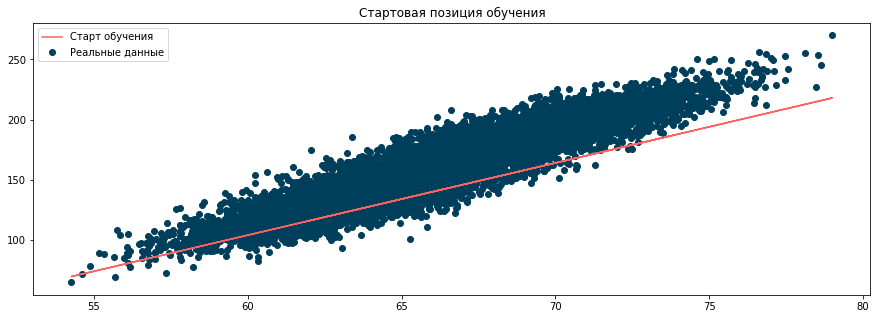

In [20]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()
ax.scatter(X_true, y_true, color='#003f5c', label='Реальные данные')
ax.plot(X_true, [f*6 + -256 for f in X_true], color='#ff6361', label='Старт обучения')
plt.title('Стартовая позиция обучения')
ax.legend()
plt.show()

In [21]:
grad_test = GradientDescents()
gd = grad_test.gradient_descent(X_true, y_true, \
                                start_a=6, start_b=-256, \
                                learning_rate=0.0002, max_steps=300000, \
                                save_steps=0)

Шаг: 300000
Функция потерь: 162.75


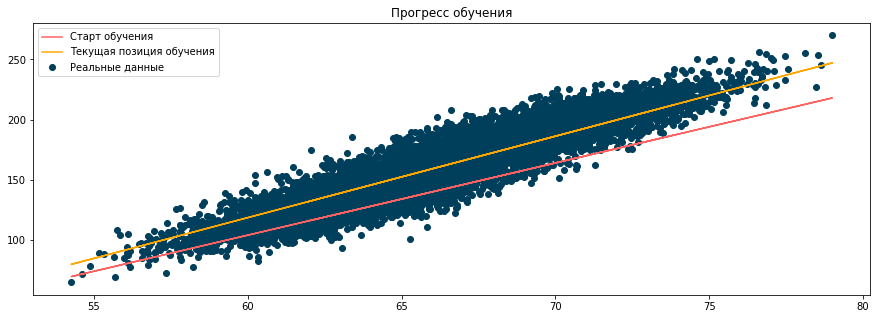

In [22]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot()
ax.scatter(X_true, y_true, color='#003f5c', label='Реальные данные')
ax.plot(X_true, [f*6 + -256 for f in X_true], color='#ff6361', \
        label='Старт обучения')
plt.plot(X_true, [f*gd['a'] + gd['b'] for f in X_true], color='#ffa600', \
         label='Текущая позиция обучения')
plt.title('Прогресс обучения')
ax.legend()
plt.show()

In [23]:
print('Формула, по которой мы будем формирвать предсказания: {:.4f}*x+{:.4f}'.format(gd['a'], gd['b']))
print('Ошибка по MSE составила: {:.4f}'.format(gd['mse']))

Формула, по которой мы будем формирвать предсказания: 6.7654*x+-287.3483
Ошибка по MSE составила: 162.7514


Можно и дальше продолжать обучение, но принцип понятен. Код работает